In [1]:
#importing necessory tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#reading a data set and printing the shape and the first five rows
df=pd.read_csv("train.csv")
print(df.shape)
df.head()

(245725, 11)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# visualization

0    187437
1     58288
Name: Is_Lead, dtype: int64


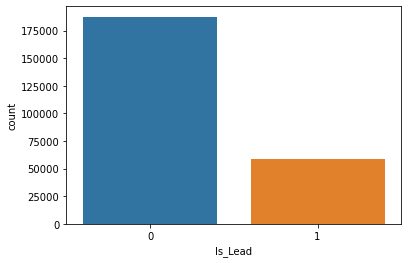

In [66]:
#checking how many people accepted and declined
print(df.Is_Lead.value_counts())
sns.countplot('Is_Lead',data=df)

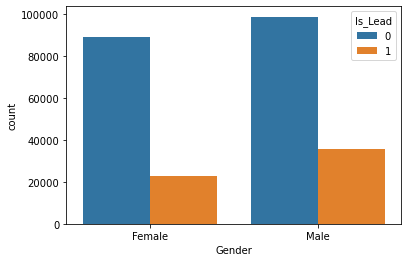

In [67]:
#checkig the acceptance based on gender 
sns.countplot("Gender",data=df,hue='Is_Lead')

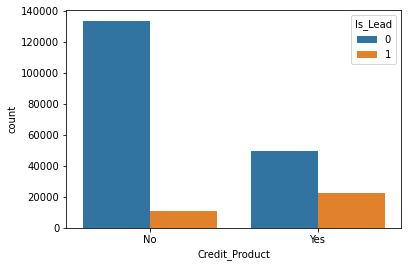

In [5]:
sns.countplot('Credit_Product',data=df,hue="Is_Lead")

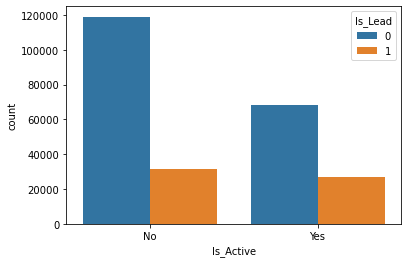

In [6]:
#graph of people who are active in last 3 months
sns.countplot("Is_Active",data=df,hue='Is_Lead')

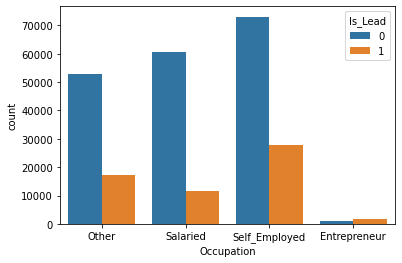

In [7]:
sns.countplot("Occupation",data=df,hue='Is_Lead')

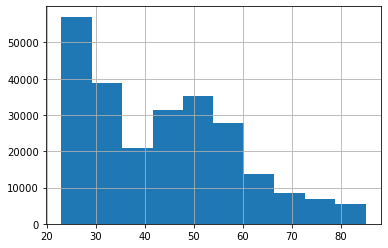

In [8]:
#distribution graph
df.Age.hist()

(array([1.48577e+05, 7.38150e+04, 1.53400e+04, 4.83400e+03, 1.58500e+03,
        7.38000e+02, 4.18000e+02, 2.82000e+02, 1.25000e+02, 1.10000e+01]),
 array([   20790. ,  1053911.9,  2087033.8,  3120155.7,  4153277.6,
         5186399.5,  6219521.4,  7252643.3,  8285765.2,  9318887.1,
        10352009. ]),
 <a list of 10 Patch objects>)

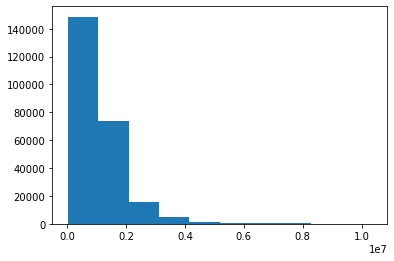

In [9]:
plt.hist('Avg_Account_Balance',data=df)

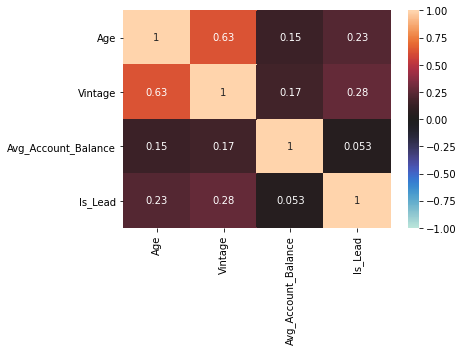

In [10]:
#correlation between features
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0)

# cleaning data

In [11]:
#checking for null values
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [12]:
#dropping null values
df.dropna(inplace=True)
df.shape

(216400, 11)

In [13]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [14]:
# checking unique values in all the columns
def unique():
    for item in df.columns:
        print(item)
        print(df[item].unique())
unique()        

ID
['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']
Gender
['Female' 'Male']
Age
[73 30 56 34 48 40 55 53 27 31 79 46 59 65 37 44 32 50 70 25 52 26 67 29
 49 64 41 60 57 28 58 43 35 71 82 42 54 61 33 47 51 68 36 83 39 24 38 74
 45 76 63 62 81 69 75 85 66 84 80 78 72 77 23]
Region_Code
['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Occupation
['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code
['X3' 'X1' 'X2' 'X4']
Vintage
[ 43  32  26  19  33  13  38  49 123  14  20  31  57  97  15  63  21  99
  56  87  55  69 104  61  91  27  50  25 117  80  81  67 109  45 122  73
  75  79 121 111 116  92  85 115  37  93 110  44   9  74  68  51  98  39
  86  62 105 103 127 129 133   8   7 128 135 134]
Credit_Product
['No' 'Yes']
Avg

In [15]:
#droping non important feature
df.drop(['ID','Region_Code'],axis=1,inplace=True)

In [16]:
df.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,Other,X3,43,No,1045696,No,0
1,Female,30,Salaried,X1,32,No,581988,No,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,Salaried,X1,19,No,470454,No,0
4,Female,30,Salaried,X1,33,No,886787,No,0


# creating dummie values for categorical data

In [17]:
gender=pd.get_dummies(df['Gender'],drop_first=True)
gender.head(5)

,Male
0,0
1,0
2,0
3,1
4,0


In [18]:
occupation=pd.get_dummies(df['Occupation'],drop_first=True)
occupation.head(5)

,Other,Salaried,Self_Employed
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [19]:
ChannelCode=pd.get_dummies(df['Channel_Code'],drop_first=True)
ChannelCode.head(5)

,X2,X3,X4
0,0,1,0
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,0


In [20]:
CreditProduct=pd.get_dummies(df['Credit_Product'],drop_first=True)
CreditProduct.head(5)

,Yes
0,0
1,0
2,0
3,0
4,0


In [21]:
IsActive=pd.get_dummies(df['Is_Active'],drop_first=True)
IsActive.head(5)

,Yes
0,0
1,0
2,1
3,0
4,0


In [22]:
df=pd.concat([df,gender,occupation,ChannelCode,CreditProduct,IsActive],axis=1)
df.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Male,Other,Salaried,Self_Employed,X2,X3,X4,Yes,Yes
0,Female,73,Other,X3,43,No,1045696,No,0,0,1,0,0,0,1,0,0,0
1,Female,30,Salaried,X1,32,No,581988,No,0,0,0,1,0,0,0,0,0,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0,0,0,0,1,0,1,0,0,1
3,Male,34,Salaried,X1,19,No,470454,No,0,1,0,1,0,0,0,0,0,0
4,Female,30,Salaried,X1,33,No,886787,No,0,0,0,1,0,0,0,0,0,0


In [23]:
df.drop(['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1,inplace=True)
df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Male,Other,Salaried,Self_Employed,X2,X3,X4,Yes,Yes
0,73,43,1045696,0,0,1,0,0,0,1,0,0,0
1,30,32,581988,0,0,0,1,0,0,0,0,0,0
2,56,26,1484315,0,0,0,0,1,0,1,0,0,1
3,34,19,470454,0,1,0,1,0,0,0,0,0,0
4,30,33,886787,0,0,0,1,0,0,0,0,0,0


In [24]:
df.columns=[
'Age','Vintage','Avg_Account_Balance','Is_Lead','Male','Other','Salaried','Self_Employed','X2','X3','X4','Yes_1','Yes_2']

In [25]:
df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Male,Other,Salaried,Self_Employed,X2,X3,X4,Yes_1,Yes_2
0,73,43,1045696,0,0,1,0,0,0,1,0,0,0
1,30,32,581988,0,0,0,1,0,0,0,0,0,0
2,56,26,1484315,0,0,0,0,1,0,1,0,0,1
3,34,19,470454,0,1,0,1,0,0,0,0,0,0
4,30,33,886787,0,0,0,1,0,0,0,0,0,0


In [26]:
# separating a dataset into feature and label
x=df.drop('Is_Lead',axis=1)
y=df['Is_Lead']

# performing all preprocessing work for test data 

In [27]:
T=pd.read_csv('test.csv')

In [28]:
test_data=pd.read_csv('test.csv')
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [29]:
test_data.drop(['ID','Region_Code'],axis=1,inplace=True)

In [30]:
gender=pd.get_dummies(test_data['Gender'],drop_first=True)
gender.head(5)

,Male
0,1
1,1
2,1
3,1
4,0


In [31]:
occupation=pd.get_dummies(test_data['Occupation'],drop_first=True)
occupation.head(5)

,Other,Salaried,Self_Employed
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [32]:
ChannelCode=pd.get_dummies(test_data['Channel_Code'],drop_first=True)
ChannelCode.head(5)

,X2,X3,X4
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [33]:
CreditProduct=pd.get_dummies(test_data['Credit_Product'],drop_first=True)
CreditProduct.head(5)

,Yes
0,1
1,0
2,0
3,0
4,0


In [34]:
IsActive=pd.get_dummies(test_data['Is_Active'],drop_first=True)
IsActive.head(5)

,Yes
0,0
1,0
2,0
3,0
4,0


In [35]:
test_data=pd.concat([test_data,gender,occupation,ChannelCode,CreditProduct,IsActive],axis=1)
test_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Male,Other,Salaried,Self_Employed,X2,X3,X4,Yes,Yes
0,Male,29,Other,X1,25,Yes,742366,No,1,1,0,0,0,0,0,1,0
1,Male,43,Other,X2,49,NaN,925537,No,1,1,0,0,1,0,0,0,0
2,Male,31,Salaried,X1,14,No,215949,No,1,0,1,0,0,0,0,0,0
3,Male,29,Other,X1,33,No,868070,No,1,1,0,0,0,0,0,0,0
4,Female,29,Other,X1,19,No,657087,No,0,1,0,0,0,0,0,0,0


In [36]:
test_data.drop(['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1,inplace=True)
test_data.head()

,Age,Vintage,Avg_Account_Balance,Male,Other,Salaried,Self_Employed,X2,X3,X4,Yes,Yes
0,29,25,742366,1,1,0,0,0,0,0,1,0
1,43,49,925537,1,1,0,0,1,0,0,0,0
2,31,14,215949,1,0,1,0,0,0,0,0,0
3,29,33,868070,1,1,0,0,0,0,0,0,0
4,29,19,657087,0,1,0,0,0,0,0,0,0


In [37]:
test_data.columns=[
'Age','Vintage','Avg_Account_Balance','Male','Other','Salaried','Self_Employed','X2','X3','X4','Yes_1','Yes_2']

In [38]:
test_data.head()

,Age,Vintage,Avg_Account_Balance,Male,Other,Salaried,Self_Employed,X2,X3,X4,Yes_1,Yes_2
0,29,25,742366,1,1,0,0,0,0,0,1,0
1,43,49,925537,1,1,0,0,1,0,0,0,0
2,31,14,215949,1,0,1,0,0,0,0,0,0
3,29,33,868070,1,1,0,0,0,0,0,0,0
4,29,19,657087,0,1,0,0,0,0,0,0,0


# training a model

In [51]:

from sklearn.ensemble import RandomForestRegressor
classifier=RandomForestRegressor(n_estimators = 200, random_state = 42)
classifier.fit(x,y)

RandomForestRegressor(n_estimators=200, random_state=42)

In [52]:
classifier.score(x,y)

0.8807663829907919

In [54]:
# testting a model
pre=classifier.predict(test_data)

In [55]:
pd.DataFrame(data={"ID":T["ID"],"Is_Lead":pre}).to_csv('randon.csv',index=False)

In [ ]:
#data set look littlebit imbalanced so performing under sampling

In [56]:
#before feeding data converting features into numpy ,coz it should be in series
x=x.to_numpy()

In [57]:
# importing RandomUnderSampler from 
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
#fitting and splliting the train data into under_train_feature and under_train_labels
x_train_under, y_train_under = under_sampler.fit_sample(x,y)

In [58]:
x_train_under.shape

(66626, 12)

In [59]:
#fitting model
under_model=RandomForestRegressor(n_estimators =200, random_state = 42)
under_model.fit(x_train_under,y_train_under)

RandomForestRegressor(n_estimators=200, random_state=42)

In [60]:
under_model.score(x_train_under,y_train_under)

0.8901595075616959

In [61]:
#prediction
pre_f=under_model.predict(test_data)

In [62]:
pd.DataFrame(data={"ID":T["ID"],"Is_Lead":pre_f}).to_csv('sam_random_F.csv',index=False)